<a href="https://colab.research.google.com/github/dhu16/strainsrecW4/blob/master/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install PyDrive

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':"1k1RdeE3ABDlv7nZfqnXujru0QRYmUarG"})
downloaded.GetContentFile('Strain_data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


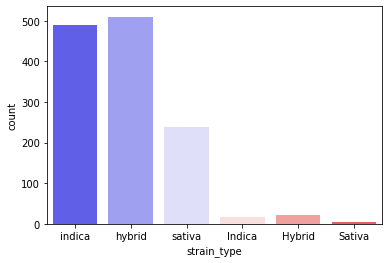

,name,strain_type,mood,effect,medical
0,Ace of Spades,indica,"{""Calm"": 1, ""Lazy"": 0.541, ""Happy"": 0.7125, ""M...","{""Sleepy"": 0.541, ""Relaxed"": 1, ""Euphoric"": 0....","{""Ease Pain"": 0.8998, ""Reduce Anxiety"": 0.7125..."
1,Sour Tsunami,hybrid,"{""Calm"": 1, ""Lazy"": 0.2992, ""Alert"": 47.71, ""M...","{""Sleepy"": 0.2992, ""Focused"": 0.4771, ""Relaxed...","{""Ease Pain"": 1, ""Relieve Stress"": 0.5987}"
2,Super Blue Dream,hybrid,"{""Calm"": 0.7155, ""Happy"": 1.0, ""Creative"": 0.6...","{""Relaxed"": 0.7155, ""Rejuvenated"": 0.781700000...","{""Ease Pain"": 0.44439999999999996, ""Cure Nause..."
3,Super Blue Dream,hybrid,"{""Calm"": 0.7155, ""Happy"": 1.0, ""Creative"": 0.6...","{""Relaxed"": 0.7155, ""Rejuvenated"": 0.781700000...","{""Ease Pain"": 0.44439999999999996, ""Cure Nause..."
4,A-Train,hybrid,"{""Happy"": 1, ""Mellow"": 0.7365999999999999, ""Cr...","{""Euphoric"": 0.7365999999999999, ""Energetic"": ...","{""Ease Pain"": 1, ""Reduce Anxiety"": 1, ""Relieve..."


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from numpy import nan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy.sparse import csr_matrix

df = pd.read_csv('Strain_data.csv', usecols=['name', 'strain_type','mood', 'effect', 'medical'], dtype={'name': 'object', 'strain_type': 'object', 'mood': 'object', 'effect': 'object', 'medical': 'object'})

#Display different types of strains
sns.countplot(x="strain_type", data=df, palette="bwr")
plt.show()
df.head()

In [7]:
df_split = ['mood','effect','medical']
result = df
for each in df_split:
    df[each] = df[each].apply(lambda x : dict(eval(str(x))) if isinstance(x, str) else None)
    df1= df[each].apply(pd.Series)
    result = pd.concat([result, df1], axis=1).drop(each, axis=1)
result

,name,strain_type,Calm,Lazy,Happy,Mellow,Uplifted,Alert,Creative,Ecstatic,Sad,Sleepy,Relaxed,Euphoric,Rejuvenated,Focused,Energetic,Hungry,Aroused,Tingly,Ease Pain,Reduce Anxiety,Relieve Stress,Insomnia Relief,Alleviate Depression,Cure Nausea,Increase Appetite,Combat Fatigue,Fight PMS/ Cramps
0,Ace of Spades,indica,1.0000,0.5410,0.7125,0.7411,0.6533,NaN,NaN,NaN,NaN,0.5410,1.0000,0.7411,0.6533,NaN,NaN,NaN,NaN,NaN,0.8998,0.7125,1.0000,0.6388,0.6242,NaN,NaN,NaN,NaN
1,Sour Tsunami,hybrid,1.0000,0.2992,NaN,0.2815,NaN,47.71,NaN,NaN,NaN,0.2992,1.0000,0.2815,NaN,0.4771,NaN,NaN,NaN,NaN,1.0000,NaN,0.5987,NaN,NaN,NaN,NaN,NaN,NaN
2,Super Blue Dream,hybrid,0.7155,NaN,1.0000,NaN,NaN,NaN,0.6707,NaN,NaN,NaN,0.7155,NaN,0.7817,NaN,NaN,NaN,NaN,NaN,0.4444,1.0000,1.0000,NaN,NaN,0.2276,0.3916,NaN,NaN
3,Super Blue Dream,hybrid,0.7155,NaN,1.0000,NaN,NaN,NaN,0.6707,NaN,NaN,NaN,0.7155,NaN,0.7817,NaN,NaN,NaN,NaN,NaN,0.4444,1.0000,1.0000,NaN,NaN,0.2276,0.3916,NaN,NaN
4,A-Train,hybrid,NaN,NaN,1.0000,0.7366,NaN,NaN,0.5556,NaN,NaN,NaN,NaN,0.7366,NaN,NaN,0.8768,NaN,NaN,NaN,1.0000,1.0000,0.9049,NaN,0.8173,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10406,Sherpa Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10407,Sherpa Berry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10408,Critical Canna-Tsu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10409,Super Silver Pot of Gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
strain = input("What strain are you looking for? ")

if strain == "sativa":
  strainSort = result[result['strain_type'].str.contains("sativa", na=False)]
  #print(strainSort['name'].sample(10))
elif strain == "indica":
  strainSort = result[result['strain_type'].str.contains("indica", na=False)]
  #print(strainSort['name'].sample(10))
elif strain == "hybrid":
  strainSort = result[result['strain_type'].str.contains("hybrid", na=False)]
  #print(strainSort['name'].sample(10))

What strain are you looking for? hybrid


In [12]:
eff = input("How do you want to feel? ")

effectSort = strainSort.filter(["name", f"{eff.capitalize()}"], axis=1)
#print(effectSort['name'].sample(10))

How do you want to feel? relaxed


In [13]:
efflevel = input("How strong do you want the effect to be: weak, normal, or strong? ")

if efflevel == "weak":
  levelSort = effectSort.filter(["name", f"{eff.capitalize()}"], axis=1)
  levelSort = levelSort[levelSort[f"{eff.capitalize()}"] <= 0.3]
  print("")
  print("Here are some suggestions!")
  print("")
  print(levelSort['name'].sample(3))
if efflevel == "normal":
  levelSort = effectSort.filter(["name", f"{eff.capitalize()}"], axis=1)
  levelSort = levelSort[(levelSort[f"{eff.capitalize()}"] > 0.3) & (levelSort[f"{eff.capitalize()}"] <= 0.75)]
  print("")
  print("Here are some suggestions!")
  print("")
  print(levelSort['name'].sample(3))
if efflevel == "strong":
  levelSort = effectSort.filter(["name", f"{eff.capitalize()}"], axis=1)
  levelSort = levelSort[(levelSort[f"{eff.capitalize()}"] > 0.75) & (levelSort[f"{eff.capitalize()}"] <= 1.00)]
  print("")
  print("Here are some suggestions!")
  print("")
  print(levelSort['name'].sample(3))

How strong do you want the effect to be: weak, normal, or strong? strong

Here are some suggestions!

1073     Lemon Kush
669     White Widow
292       Jack Kush
Name: name, dtype: object
